<a href="https://colab.research.google.com/github/tushar69basak/hello/blob/main/Final_Project_RandomCaption_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
# Load pre-trained models and tokenizer
model = VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
feature_extractor = ViTImageProcessor.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
tokenizer = AutoTokenizer.from_pretrained('nlpconnect/vit-gpt2-image-captioning')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
# Use CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
# Set generation parameters
max_length = 50  # Increase maximum length
num_beams = 8   # Increase beam size
temperature = 0.7  # Adjust temperature for sampling

gen_kwargs = {"max_length": max_length, "num_beams": num_beams, "temperature": temperature}


In [ ]:
# Function to generate a demo user profile
def generate_demo_user():
    # Generate random user data
    first_names = ["John", "Emily", "Michael", "Sophia", "Daniel"]
    last_names = ["Smith", "Johnson", "Williams", "Brown", "Jones"]
    email_domains = ["gmail.com", "yahoo.com", "hotmail.com"]
    interests = ["Technology", "Travel", "Cooking", "Fitness", "Photography"]
    behaviors = ["Active", "Social", "Adventurous", "Creative", "Analytical"]
    likes = ["Hiking", "Reading", "Music", "Movies", "Gaming"]
    dislikes = ["Spiders", "Loud noises", "Cold weather", "Traffic jams", "Public speaking"]

    first_name = random.choice(first_names)
    last_name = random.choice(last_names)
    email = f"{first_name.lower()}.{last_name.lower()}@{random.choice(email_domains)}"
    phone_number = f"+1 555-{random.randint(100, 999)}-{random.randint(1000, 9999)}"
    interest = random.choice(interests)
    behavior = random.choice(behaviors)
    like = random.choice(likes)
    dislike = random.choice(dislikes)

    # Construct the user profile dictionary
    user_profile = {
        "First Name": first_name,
        "Last Name": last_name,
        "Email": email,
        "Phone Number": phone_number,
        "Interests": interest,
        "Behavior": behavior,
        "Likes": like,
        "Dislikes": dislike
    }

    return user_profile


In [ ]:
# Function to generate a caption from an image
def generate_caption(image_path):
    # Load and preprocess the image
    image = Image.open(image_path)
    inputs = feature_extractor(images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate captions
    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_kwargs)

    # Decode the generated captions
    caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return caption

Michael Johnson shared the following post:
Caption: a family sitting around a picnic table 
Share successful!



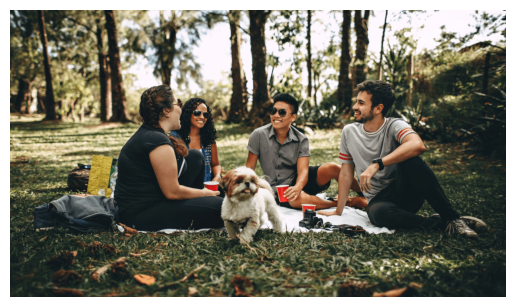

Emily Brown shared the following post:
Caption: a variety of food on a tray on a table 
Share successful!



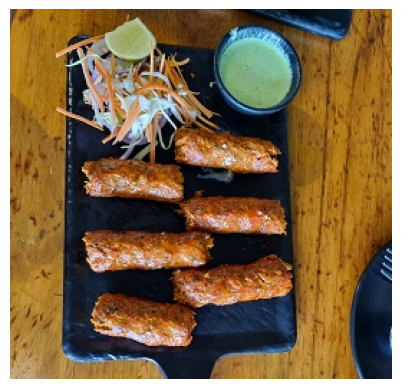

Daniel Brown shared the following post:
Caption: people sitting around a wooden table 
Share successful!



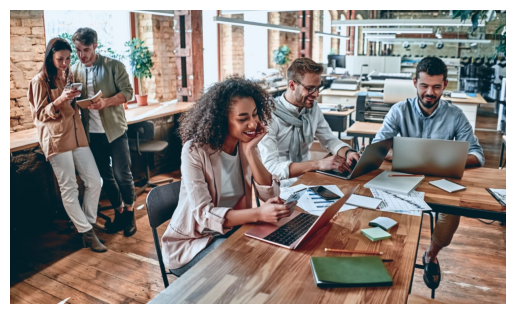

Daniel Smith shared the following post:
Caption: a woman is talking on a cell phone 
Share successful!



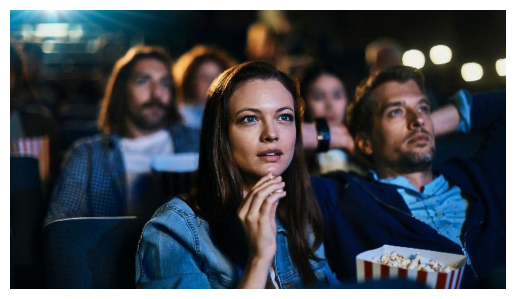

Daniel Smith shared the following post:
Caption: a woman in a red dress standing in front of a wall 
Share successful!



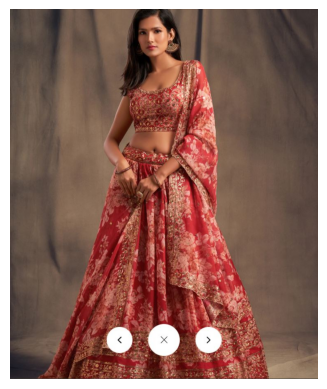

In [ ]:
# Function to simulate a user sharing a post
def share_post(user_profile, image_path, caption):

    # Print post details
    print(f"{user_profile['First Name']} {user_profile['Last Name']} shared the following post:")
    print(f"Caption: {caption}")
    # print("Caption:", f"<b>{caption}</b>")
    print("Share successful!\n")

    # Show the image
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    # plt.title("Shared Image")
    plt.show()



# Get a list of image files
image_folder = "/content/images"  # Folder containing your images
image_files = os.listdir(image_folder)
random.shuffle(image_files)

# Generate and share posts for each user with a different image
for _ in range(5):
    # Generate a demo user profile
    demo_user = generate_demo_user()

    # Get the next image file
    image_file = image_files.pop(0)
    image_path = os.path.join(image_folder, image_file)

    # Generate a caption from the image
    caption = generate_caption(image_path)

    # Share the post
    share_post(demo_user, image_path, caption)
